# Healthcare.
Course-end Project 2

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

## Variables	Description
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: Two hour serum insulin
- BMI: Body Mass Index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age in years
- Outcome: Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
## Project Task: Week 1
- Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 
## Project Task: Week 2
- Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## Project Task: Week 3
- Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

## Project Task: Week 4
- Data Modeling:
1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.
- Data Reporting:
2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
- a. Pie chart to describe the diabetic or non-diabetic population
- b. Scatter charts between relevant variables to analyze the relationships
- c. Histogram or frequency charts to analyze the distribution of the data
- d. Heatmap of correlation analysis among the relevant variables
- e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
input0=pd.read_csv('./dataset/diabetes.csv')

In [3]:
input0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
input0.shape

(768, 9)

# Data Exploration

## Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [5]:
input0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Checking null values
input0.isna().sum()/input0.shape[0]*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [49]:
input1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Checking null values on Glucose features

In [8]:
input0[input0['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
input0[input0['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
input0[input0['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [11]:
input0[input0['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
input0[input0['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [13]:
null_contain_columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [14]:
def null_checker(data):
    for i in null_contain_columns:
        num_nulls=data[data[i]==0].shape[0]
        print(f'Number of null values in {i}: {num_nulls}')

In [15]:
null_checker(input0)

Number of null values in Glucose: 5
Number of null values in BloodPressure: 35
Number of null values in SkinThickness: 227
Number of null values in Insulin: 374
Number of null values in BMI: 11


## Visually explore these variables using histograms. Treat the missing values accordingly.

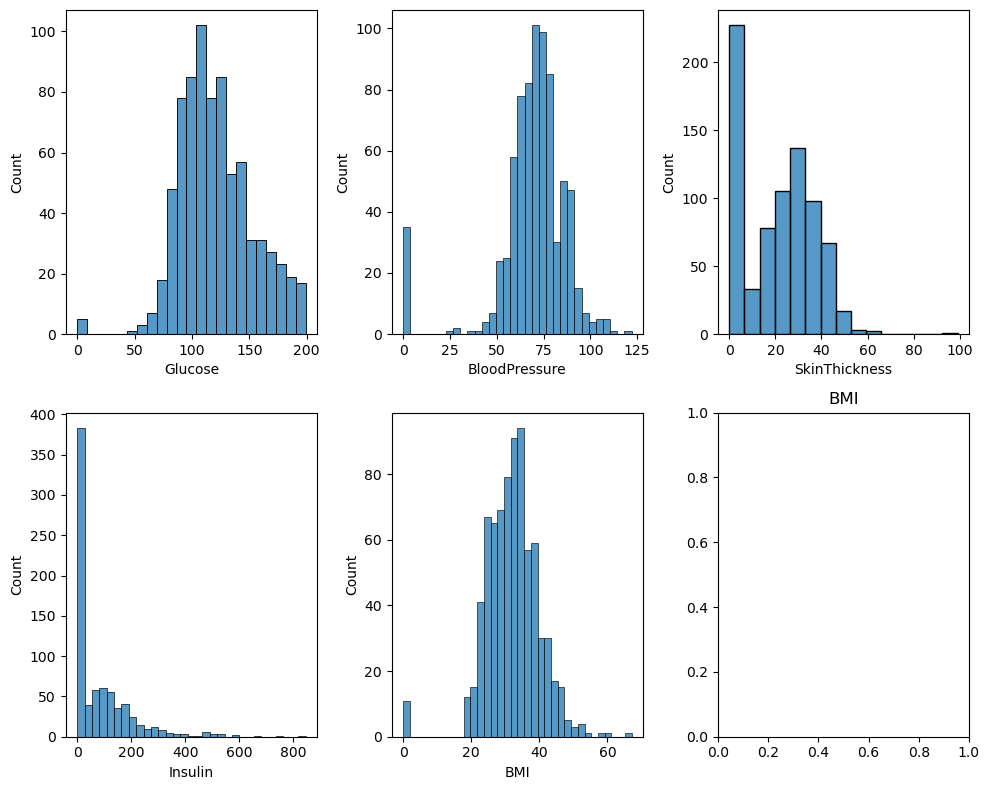

In [16]:
fig,ax=plt.subplots(2,3,figsize=(10,8))

for ax,col in zip(ax.flatten(),null_contain_columns):
    plt.title(col)
    sns.histplot(input0[col],ax=ax)
plt.tight_layout()
plt.show()

In [17]:
dict(input0[null_contain_columns].describe().loc['std'])

{'Glucose': 31.97261819513622,
 'BloodPressure': 19.355807170644777,
 'SkinThickness': 15.952217567727677,
 'Insulin': 115.24400235133837,
 'BMI': 7.8841603203754405}

In [18]:
def imputer(dataset,selected_cols):
    data=dataset.copy() 
    get_std=dict(data[selected_cols].describe().loc['std'])
    
    for col in get_std.keys():
        if get_std[col]<=20:
            data[col]=data[col].replace({0:data[col].mean()})
        else:
            data[col]=data[col].replace({0:data[col].median()})
    return data

In [19]:
input0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
input1=imputer(input0,null_contain_columns)

In [21]:
null_checker(input1)

Number of null values in Glucose: 0
Number of null values in BloodPressure: 0
Number of null values in SkinThickness: 0
Number of null values in Insulin: 0
Number of null values in BMI: 0


## There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [22]:
dtypes_=input1.dtypes.reset_index(name='dtypes')
dtypes_['dtypes']=dtypes_['dtypes'].astype('string')

In [23]:
dtypes_

,index,dtypes
0,Pregnancies,int64
1,Glucose,int64
2,BloodPressure,float64
3,SkinThickness,float64
4,Insulin,float64
5,BMI,float64
6,DiabetesPedigreeFunction,float64
7,Age,int64
8,Outcome,int64


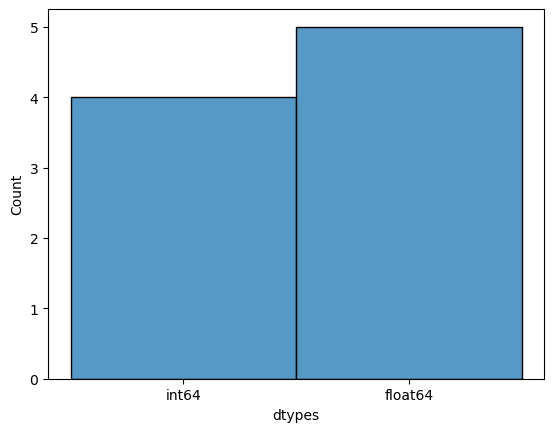

In [24]:
sns.histplot(dtypes_['dtypes'])
plt.show()

## Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

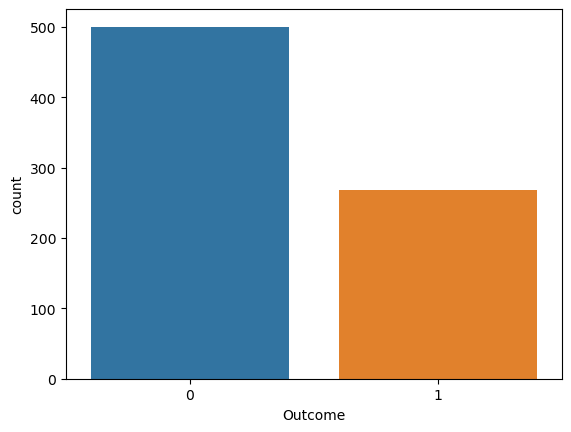

In [25]:
sns.countplot(x=input1['Outcome'])
plt.show()

## Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

### Features that are related to Pregnancies

In [26]:
picked_features=[
    ['Pregnancies','Age'],
    ['Glucose','Insulin'],
    ['Glucose','Age'],
    ['Glucose','BMI'],
    ['BloodPressure','Age'],
    ['SkinThickness','BMI'],
    ['SkinThickness','Insulin'],
    ['DiabetesPedigreeFunction','Insulin']
]

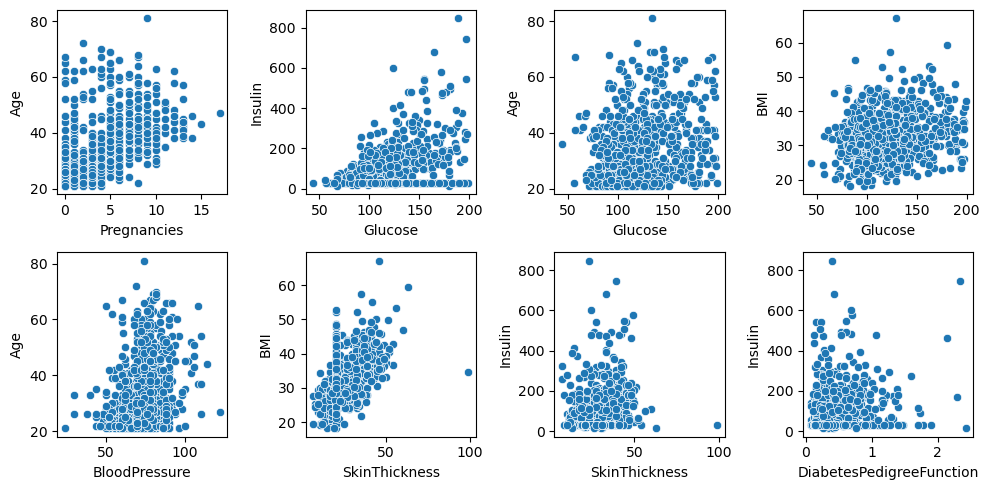

In [27]:
fig,ax=plt.subplots(2,4,figsize=(10,5))

for ax,col in zip(ax.flatten(),picked_features):
    sns.scatterplot(data=input1,x=col[0],y=col[1],ax=ax)
plt.tight_layout()
plt.show()

## Perform correlation analysis. Visually explore it using a heat map.

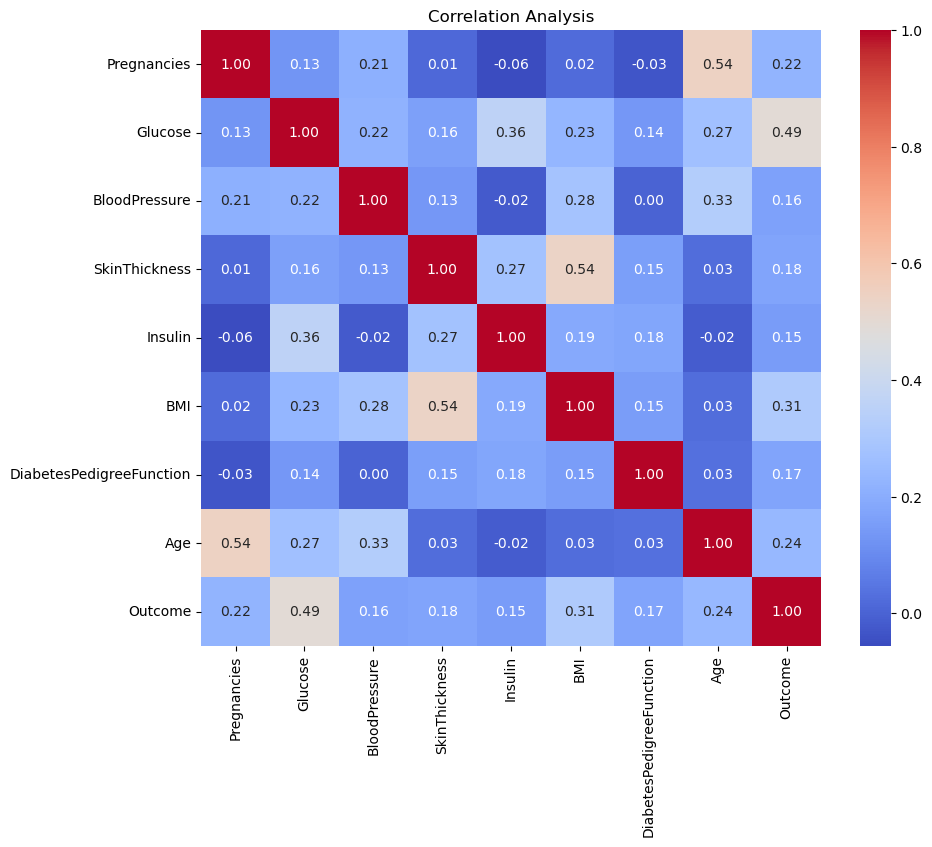

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208984       0.013376   
Glucose                      0.128213  1.000000       0.219970       0.160495   
BloodPressure                0.208984  0.219970       1.000000       0.134155   
SkinThickness                0.013376  0.160495       0.134155       1.000000   
Insulin                     -0.055697  0.357573      -0.022049       0.274253   
BMI                          0.021546  0.231408       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137327       0.000371       0.154961   
Age                          0.544341  0.266909       0.326740       0.026423   
Outcome                      0.221898  0.492782       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231

In [28]:
# Calculate correlation matrix
corr=input1.corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Analysis')
plt.show()

#Describe findings
print(corr)

## Data Modeling:
### Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [29]:
input1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
X=input1.drop('Outcome',axis=1)
y=input1[['Outcome']]

In [31]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
model1=KNeighborsClassifier(n_neighbors=20)

In [34]:
model1.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=20)

In [35]:
y_pred=model1.predict(X_test)

C:\Users\rajal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
accuracy_score(y_test,y_pred)

0.6948051948051948

In [37]:
k_fold=KFold(n_splits=5,shuffle=True,random_state=42)

In [38]:
scores=cross_val_score(model1,X_train,y_train,cv=k_fold,scoring='accuracy')

C:\Users\rajal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rajal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rajal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [39]:
print('Corss val score',scores)
print('Mean Accuracy',scores.mean())
print('Standard Devation',scores.std())

Corss val score [0.79674797 0.80487805 0.73170732 0.79674797 0.75409836]
Mean Accuracy 0.7768359322937491
Standard Devation 0.028750400565096944


## Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [40]:
sensitivity=confusion_matrix(y_test,y_pred)[1,1]/(confusion_matrix(y_test,y_pred)[1,0]+confusion_matrix(y_test,y_pred)[1,1])
sensitivity

0.3684210526315789

In [41]:
specificity=confusion_matrix(y_test,y_pred)[0,0]/(confusion_matrix(y_test,y_pred)[0,0]+confusion_matrix(y_test,y_pred)[0,1])
specificity

0.8865979381443299

In [42]:
y_prob=model1.predict_proba(X_test)[:,1]

In [43]:
roc_auc=roc_auc_score(y_test,y_prob)

In [44]:
accuracy=accuracy_score(y_test,y_pred)

In [45]:
print('Sensitivity (recall): ',sensitivity)
print('Specificity: ',specificity)
print('AUC (ROC Curve): ',roc_auc)
print('Accuracy: ',accuracy)

Sensitivity (recall):  0.3684210526315789
Specificity:  0.8865979381443299
AUC (ROC Curve):  0.7305118466268764
Accuracy:  0.6948051948051948


In [46]:
report=classification_report(y_test,y_pred)

In [47]:
print(report)

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        97
           1       0.66      0.37      0.47        57

    accuracy                           0.69       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.69      0.67       154



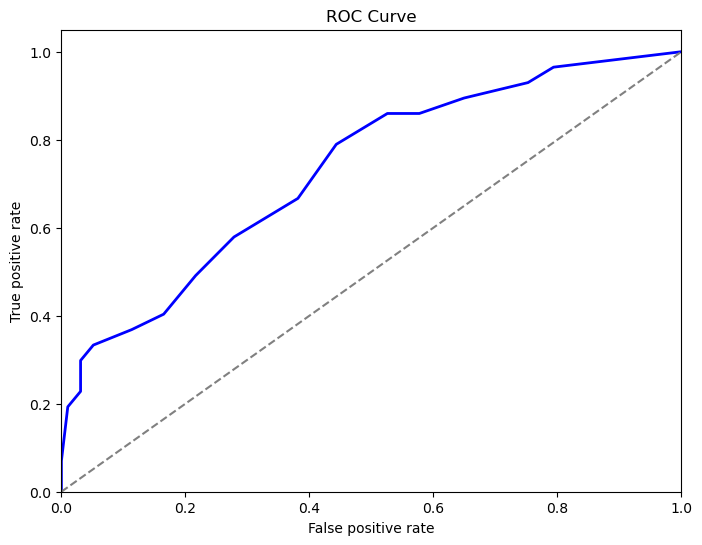

In [48]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='b',lw=2)
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()